In [3]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 585.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 930.4 kB/s eta 0:00:001.0 MB/s eta 0:00:01


In [4]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 874.5 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [5]:
!pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 465.4 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 679.4 kB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 KB 839.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 685.5 kB/s eta 0:00:000:00:01m eta 0:00:01


In [7]:
import tensorflow as tf

2023-05-28 12:05:16.834411: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-28 12:05:16.865818: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 12:05:17.029705: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 12:05:17.031145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 12:05:18.044795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [10]:
print(tf.__version__)

2.12.0


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
train_df = pd.read_csv(r"fashion-mnist_train.csv")

In [22]:
test_df = pd.read_csv(r"fashion-mnist_test.csv")

In [14]:
train_df.shape

(60000, 785)

In [16]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

In [27]:
x_train = train_data[:,1:]/255 # rescaling the pixels betwen 0 and 1
y_train = train_data[:,0]

x_test = test_data[:,1:]/255 # rescaling the pixels betwen 0 and 1
y_test = test_data[:,0]

In [28]:
print(x_train.shape)
y_train.shape

(60000, 784)


(60000,)

## Divide training data into test and validation sets

In [35]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=1234)

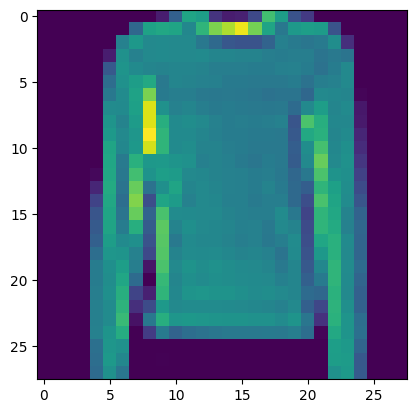

In [39]:
image = x_train[2,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [44]:
im_row = 28
im_col = 28
batch_size = 512
im_shape = (im_row, im_col, 1)

In [45]:
# formatting all the images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

In [46]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (38400, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (9600, 28, 28, 1)


## Define the model

In [47]:
cnn_model = Sequential([Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
                       MaxPooling2D(pool_size=2)# Downsampling
                        , Dropout(0.2),
                        Flatten(),
                        Dense(32, activation='relu'),
                        Dense(10, activation='softmax')
                       ])

## Compile the model

In [48]:
cnn_model.compile(
loss = 'sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

/home/solid/.local/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Model training

In [52]:
cnn_model.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=1,
             validation_data=(x_test,y_test))

Epoch 1/10
75/75 - 6s - loss: 0.2734 - accuracy: 0.9025 - val_loss: 0.2813 - val_accuracy: 0.9022 - 6s/epoch - 83ms/step
Epoch 2/10
75/75 - 5s - loss: 0.2652 - accuracy: 0.9059 - val_loss: 0.2805 - val_accuracy: 0.9038 - 5s/epoch - 66ms/step
Epoch 3/10
75/75 - 5s - loss: 0.2604 - accuracy: 0.9084 - val_loss: 0.2814 - val_accuracy: 0.9037 - 5s/epoch - 69ms/step
Epoch 4/10
75/75 - 7s - loss: 0.2534 - accuracy: 0.9091 - val_loss: 0.2733 - val_accuracy: 0.9034 - 7s/epoch - 91ms/step
Epoch 5/10
75/75 - 8s - loss: 0.2508 - accuracy: 0.9110 - val_loss: 0.2686 - val_accuracy: 0.9056 - 8s/epoch - 105ms/step
Epoch 6/10
75/75 - 6s - loss: 0.2470 - accuracy: 0.9126 - val_loss: 0.2654 - val_accuracy: 0.9066 - 6s/epoch - 78ms/step
Epoch 7/10
75/75 - 5s - loss: 0.2429 - accuracy: 0.9123 - val_loss: 0.2635 - val_accuracy: 0.9074 - 5s/epoch - 68ms/step
Epoch 8/10
75/75 - 5s - loss: 0.2370 - accuracy: 0.9158 - val_loss: 0.2596 - val_accuracy: 0.9078 - 5s/epoch - 68ms/step
Epoch 9/10
75/75 - 5s - loss: 0

In [53]:
score = cnn_model.evaluate(x_test,y_test, verbose=0)
print('Loss',score[0])
print('Accuracy',score[1])

Loss 0.26927539706230164
Accuracy 0.9039999842643738


In [54]:
from tensorflow.keras import mnist

ImportError: cannot import name 'mnist' from 'tensorflow.keras' (/home/solid/.local/lib/python3.10/site-packages/keras/api/_v2/keras/__init__.py)